Optimización de enjambre de partículas
===

* 30:00 min | Última modificación: Mayo 23, 2021 | [YouTube]

## Función a minimizar

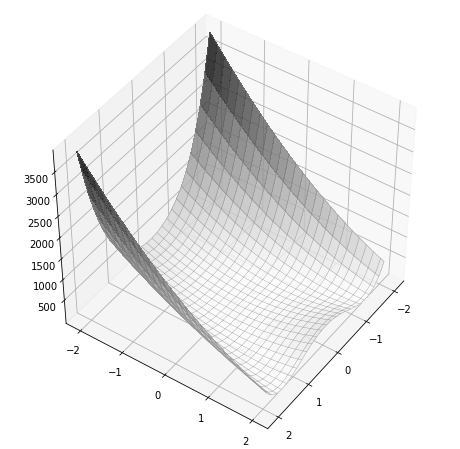

In [1]:
from EAOS.benchmarks import Ackley, Griewank, Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

## Algoritmo

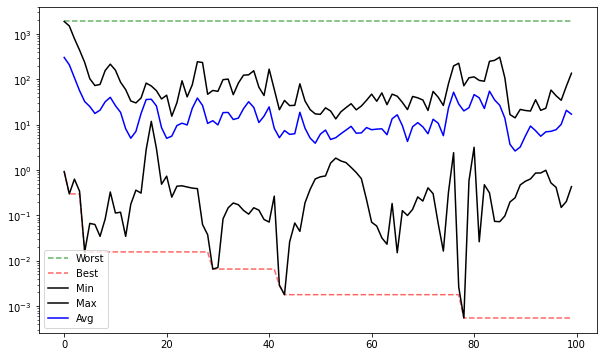

In [2]:
from EAOS.algorithms import ParticleSwarmOptimization
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor

POPSIZE = 20
NGEN = 100

generate_population = RandomUniform(
    popsize=POPSIZE,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

evaluate = FnEvaluator(fn=fn)

optimizer = ParticleSwarmOptimization(
    fn=fn,
    velocity_max=0.3,
    cognition_learning_rate=2.05,
    social_learning_rate=2.05,
    seed=123456,
)
monitor = Monitor()

population = generate_population()
population = evaluate(population)

for _ in range(NGEN):
    population = optimizer(population)
    monitor(population)


monitor.plot_stats()

In [3]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.89477788, 0.2705411 ]), 0.0005484830003076577)